In [1]:
import torch

layers = []
for i in range(6):  # Pythia-70m has 6 layers (0-5)
    layer = torch.load(f"../weights/linearity/lss/linearity_lss_pythia-70m_Layer-1_difference-in-means_safety_Layer{i}.pt")
    layers.append(layer)

In [2]:
# Load random concept vector results
random_layers = []
for i in range(6):  # Pythia-70m has 6 layers (0-5)
    random_layer = torch.load(f"../weights/linearity/lss/linearity_lss_pythia-70m_Layer-1_difference-in-means_safety_Layer{i}_random.pt")
    random_layers.append(random_layer)

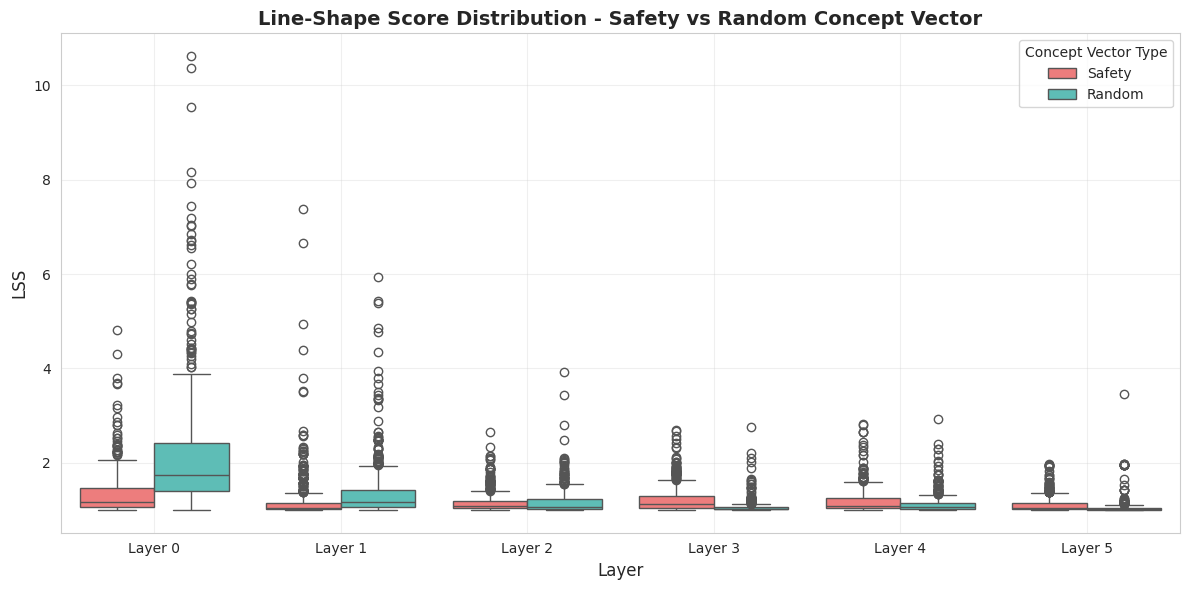

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Prepare data for overlapping box plots
data = []
for i in range(6):
    for val in layers[i]:
        data.append({'Layer': f'Layer {i}', 'LSS': val, 'Type': 'Safety'})
    for val in random_layers[i]:
        data.append({'Layer': f'Layer {i}', 'LSS': val, 'Type': 'Random'})

df = pd.DataFrame(data)

# Create overlapping box plot
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn boxplot with hue for different colors
sns.boxplot(data=df, x='Layer', y='LSS', hue='Type', ax=ax, palette=['#FF6B6B', '#4ECDC4'])

ax.set_xlabel('Layer', fontsize=12)
ax.set_ylabel('LSS', fontsize=12)
ax.set_title('Line-Shape Score Distribution - Safety vs Random Concept Vector', fontsize=14, fontweight='bold')
ax.legend(title='Concept Vector Type', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lss_boxplot_safety_vs_random_pythia-70m.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()